# K-Means Clustering

## Importing the libraries

In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [84]:
dataset = pd.read_csv('Helsinki_rent.csv')
dataset

,ID,HouseType,Size,MonthlyRentals,City,Sauna,Balcony,Address,Latitude,Longitude,Number_Of_Rooms
0,4561,kerrostalo,17.8,295,Helsinki,0,0,"Ida Aalbergin, 00400, Helsinki",60.230411,24.900260,1
1,6711,kerrostalo,17.8,295,Helsinki,0,0,"Ida Aalbergin, 00400, Helsinki",60.230411,24.900260,1
2,16643,kerrostalo,17.8,295,Helsinki,0,0,"Ida Aalbergin, 00400, Helsinki",60.230411,24.900260,1
3,13998,kerrostalo,25.0,350,Helsinki,0,0,"Valhallankatu 5.A.1, 00250, Helsinki",60.184918,24.912827,0
4,7619,kerrostalo,25.0,370,Helsinki,0,0,"Valhallankatu 5, 00250, Helsinki",60.184028,24.913289,0
...,...,...,...,...,...,...,...,...,...,...,...
2137,7991,kerrostalo,75.5,986,Helsinki,0,0,"Maisemamaalauksenkatu 1, 00430, Helsinki",60.259528,24.886313,4
2138,7032,kerrostalo,45.5,987,Helsinki,0,1,"Sofianlehdonkatu 5a, 00610, Helsinki",60.205106,24.949575,2
2139,14847,kerrostalo,NaN,989,Helsinki,1,0,"Kaivonkatsojantie 8, 00980, Helsinki",60.205087,25.136130,2
2140,8013,kerrostalo,80.0,991,Helsinki,0,0,"Maisemamaalauksenkatu 1, 00430, Helsinki",60.259528,24.886313,4


In [85]:
dataset = dataset[dataset['Latitude'].notna()] 
dataset = dataset[dataset['Longitude'].notna()] 

## Using the elbow method to find the optimal number of clusters

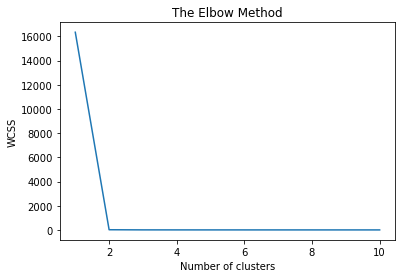

In [92]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [93]:
X=dataset.loc[:,['Latitude','Longitude']]
X.head(10)

,Latitude,Longitude
0,60.230411,24.900260
1,60.230411,24.900260
2,60.230411,24.900260
3,60.184918,24.912827
4,60.184028,24.913289
5,60.240332,25.075256
6,60.235850,25.067794
7,60.230407,24.973222
8,60.237931,24.882157
9,60.238784,24.868355


In [95]:
kmeans = KMeans(n_clusters = 1, init ='k-means++')
kmeans.fit(X[X.columns[:]]) # Compute k-means clustering.
X['cluster_label'] = kmeans.fit_predict(X[X.columns[:]])
centers = kmeans.cluster_centers_ # Coordinates of cluster centers.
labels = kmeans.predict(X[X.columns[:]]) # Labels of each point
X.head(10)

,Latitude,Longitude,cluster_label
0,60.230411,24.900260,0
1,60.230411,24.900260,0
2,60.230411,24.900260,0
3,60.184918,24.912827,0
4,60.184028,24.913289,0
5,60.240332,25.075256,0
6,60.235850,25.067794,0
7,60.230407,24.973222,0
8,60.237931,24.882157,0
9,60.238784,24.868355,0


In [96]:
X = X[X.cluster_label != 2]
X


,Latitude,Longitude,cluster_label
0,60.230411,24.900260,0
1,60.230411,24.900260,0
2,60.230411,24.900260,0
3,60.184918,24.912827,0
4,60.184028,24.913289,0
...,...,...,...
2137,60.259528,24.886313,0
2138,60.205106,24.949575,0
2139,60.205087,25.136130,0
2140,60.259528,24.886313,0


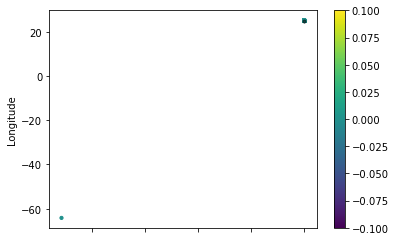

In [97]:
X.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=10, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=10, alpha=0.5)

## Training the K-Means model on the dataset

In [30]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

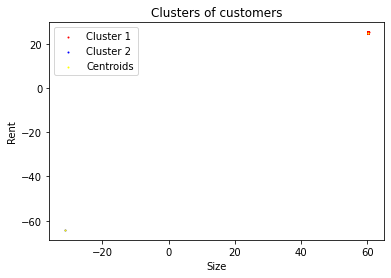

In [37]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 1, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 1, c = 'blue', label = 'Cluster 2')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 1, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Size')
plt.ylabel('Rent')
plt.legend()
plt.show()